**LeNet-5로 MNIST 인식하기** 

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dropout,Dense
from tensorflow.keras.optimizers import Adam

(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

cnn=Sequential()
cnn.add(Conv2D(6,(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2),strides=2))
cnn.add(Conv2D(16,(5,5),padding='valid',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2),strides=2))
cnn.add(Conv2D(120,(5,5),padding='valid',activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(units=84,activation='relu'))
cnn.add(Dense(units=10,activation='softmax'))

cnn.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),
metrics=['accuracy'])
cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

res=cnn.evaluate(x_test,y_test,verbose=0)
print('정확률=',res[1]*100)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/30


c:\Users\asia\anaconda3\envs\cv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 - 2s - 4ms/step - accuracy: 0.9051 - loss: 0.3171 - val_accuracy: 0.9738 - val_loss: 0.0862
Epoch 2/30
469/469 - 1s - 3ms/step - accuracy: 0.9731 - loss: 0.0873 - val_accuracy: 0.9829 - val_loss: 0.0515
Epoch 3/30
469/469 - 1s - 3ms/step - accuracy: 0.9810 - loss: 0.0624 - val_accuracy: 0.9844 - val_loss: 0.0474
Epoch 4/30
469/469 - 1s - 3ms/step - accuracy: 0.9843 - loss: 0.0494 - val_accuracy: 0.9860 - val_loss: 0.0430
Epoch 5/30
469/469 - 1s - 3ms/step - accuracy: 0.9872 - loss: 0.0394 - val_accuracy: 0.9879 - val_loss: 0.0353
Epoch 6/30
469/469 - 1s - 3ms/step - accuracy: 0.9900 - loss: 0.0320 - val_accuracy: 0.9879 - val_loss: 0.0348
Epoch 7/30
469/469 - 1s - 3ms/step - accuracy: 0.9914 - loss: 0.0282 - val_accuracy: 0.9894 - val_loss: 0.0318
Epoch 8/30
469/469 - 1s - 3ms/step - accuracy: 0.9914 - loss: 0.0257 - val_accuracy: 0.9903 - val_loss: 0.0286
Epoch 9/30
469/469 - 1s - 3ms/step - accuracy: 0.9933 - loss: 0.0213 - val_accuracy: 0.9893 - val_loss: 0.0330
Epoch 10/30


: 

**컨볼루션 신경망으로 자연 영상 인식하기**

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dropout,Dense
from tensorflow.keras.optimizers import Adam

(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(units=512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(units=10,activation='softmax'))

cnn.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),
metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=100,validation_data=(x_test,y_test),verbose=2)

cnn.save('cnn_v2.h5')

res=cnn.evaluate(x_test,y_test,verbose=0)
print('정확률=',res[1]*100)

**증강된 영상 확인하기**

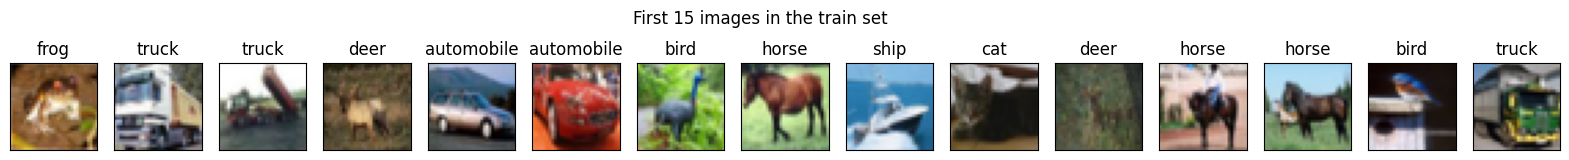

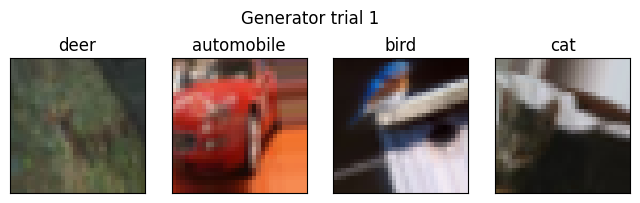

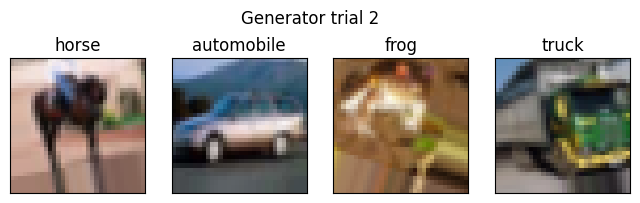

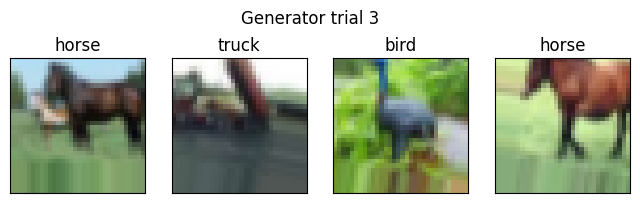

In [9]:
import tensorflow.keras.datasets as ds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# 데이터 로드
(x_train, y_train), (x_test, y_test) = ds.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_train, y_train = x_train[:15], y_train[:15]

# 클래스 이름
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 원본 이미지 시각화
plt.figure(figsize=(20, 2))
plt.suptitle("First 15 images in the train set")
for i in range(15):
    plt.subplot(1, 15, i+1)
    plt.imshow(x_train[i])
    plt.xticks([]); plt.yticks([])
    plt.title(class_names[int(y_train[i][0])])  # ✅ 수정
plt.show()

# 데이터 증강 설정
batch_size = 4
generator = ImageDataGenerator(
    rotation_range=20.0,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
gen = generator.flow(x_train, y_train, batch_size=batch_size)

# 증강 이미지 시각화
for a in range(3):
    img, label = next(gen)
    plt.figure(figsize=(8, 2.4))
    plt.suptitle("Generator trial " + str(a+1))
    for i in range(batch_size):
        plt.subplot(1, batch_size, i+1)
        plt.imshow(img[i])
        plt.xticks([]); plt.yticks([])
        plt.title(class_names[int(label[i][0])])  # ✅ 수정
    plt.show()


**ResNet50으로 자연 영상 인식하기**

In [14]:
import cv2 as cv
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input, decode_predictions

model=ResNet50(weights='imagenet')

img=cv.imread('rabbit.jpg')
x=np.reshape(cv.resize(img,(224,224)),(1,224,224,3))
x=preprocess_input(x)

preds=model.predict(x)
top5=decode_predictions(preds,top=5)[0]
print('result:',top5)

for i in range(5):
    cv.putText(img,top5[i][1]+':'+str(top5[i][2]),(10,200+i*20),cv.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255),1)

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


cv.imshow('Recognition result',img)

cv.waitKey()
cv.destroyAllWindows()

1/1 [==============================] - 0s 363ms/step
result: [('n02325366', 'wood_rabbit', 0.7425023), ('n02326432', 'hare', 0.2404846), ('n02328150', 'Angora', 0.0088086575), ('n01877812', 'wallaby', 0.0026935127), ('n02356798', 'fox_squirrel', 0.0012319587)]
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11305641412369595794
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9902751744
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15496236583437267841
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4070, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419
]


**DenseNet21로 견종 인식하기**